<a href="https://colab.research.google.com/github/RafaaelMendonca/desafio-dio-power-bi/blob/main/Analise_lancamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/Projeto DIO/Lancamentos_empresarial.xlsx'
df = pd.read_excel(file_path)

Mounted at /content/drive


In [4]:
display(df.head(1))

,Filial,Centro de Custo,Fornecedor,Emissão,Vencimento,Valor
0,São Paulo,Produção,ABC Indústria,2024-09-01,2024-09-10,1500


In [22]:
# Verificando o tipo das colunas
df.dtypes

Filial                          object
Centro de Custo                 object
Fornecedor                      object
Emissão                 datetime64[ns]
Vencimento              datetime64[ns]
Valor                          float64
Contabilidade                   object
Prazo do Vencimento    timedelta64[ns]
dtype: object

In [21]:
# Alterando o tipo da coluna 'Valor' para float
df['Valor'] = df['Valor'].astype("float")

In [23]:
df['Fornecedor'].unique()

array(['ABC Indústria', 'XYZ Serviços', 'DEF Manutenção',
       'GHI Tecnologia', 'JKL Consultoria', 'GHE Tecnologia',
       'VWX Projetos', 'YZA Advocacia'], dtype=object)

In [9]:
# Criando uma coluna com código predefinido para os Fornecedores
mapa_fornecedor = {
    'ABC Indústria' : "00036 - Serviço Industrial",
    'XYZ Serviços' : "00058 - Mão de Obra Serviços",
    'DEF Manutenção' : "00298 - Mão de Obra Manutenção",
    'GHI Tecnologia' : "01152 - Serviços de Tecnologia",
    'GHE Tecnologia' : "01152 - Serviços de Tecnologia",
    'VWX Projetos' : "00983 - Engenharia",
    'YZA Advocacia' : "00985 - Serviços de Advocacia",
    'JKL Consultoria' : "00382 - Serviços de Consultoria"
}

# Alterando o tipo da coluna do Fornecedor e criando uma coluna para colocar os codigos contabeis

df['Fornecedor'] = df['Fornecedor'].astype(str)
df['Contabilidade'] = df['Fornecedor'].map(mapa_fornecedor)
display(df.head())

,Filial,Centro de Custo,Fornecedor,Emissão,Vencimento,Valor,Contabilidade
0,São Paulo,Produção,ABC Indústria,2024-09-01,2024-09-10,1500.0,00036 - Serviço Industrial
1,Rio de Janeiro,Logística,XYZ Serviços,2024-09-05,2024-09-15,2300.0,00058 - Mão de Obra Serviços
2,Belo Horizonte,Administrativo,DEF Manutenção,2024-09-10,2024-09-20,900.0,00298 - Mão de Obra Manutenção
3,Curitiba,TI,GHI Tecnologia,2024-09-15,2024-09-25,1800.0,01152 - Serviços de Tecnologia
4,Porto Alegre,Vendas,JKL Consultoria,2024-09-20,2024-09-30,1200.0,00382 - Serviços de Consultoria


In [24]:
# Verificando se existe alguma coluna com dados vazios
df_vazios = df.isnull().sum()
print(df_vazios)

Filial                 0
Centro de Custo        0
Fornecedor             0
Emissão                0
Vencimento             0
Valor                  0
Contabilidade          0
Prazo do Vencimento    0
dtype: int64


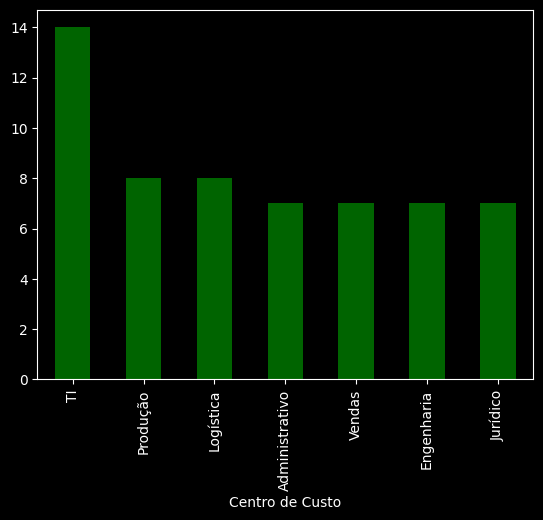

In [11]:
# Verificando o total de lançamenos por setores através de graficos
plt.style.use("dark_background")
df['Centro de Custo'].value_counts().plot.bar(color="darkgreen");

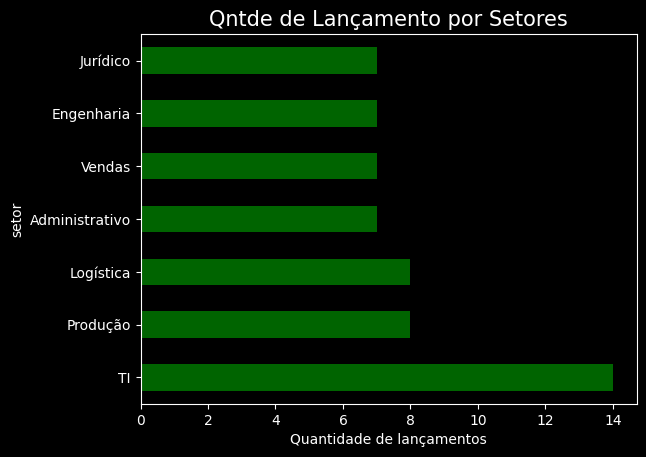

In [12]:
df['Centro de Custo'].value_counts().plot.barh(color="darkgreen")
plt.title("Qntde de Lançamento por Setores", fontsize = 15)
plt.ylabel("setor")
plt.xlabel("Quantidade de lançamentos");

In [13]:
# Verificando a quantidade de lançamentos por setores
print(df['Centro de Custo'].value_counts())

Centro de Custo
TI                14
Produção           8
Logística          8
Administrativo     7
Vendas             7
Engenharia         7
Jurídico           7
Name: count, dtype: int64


In [29]:
df['Valor'].sum()

160450.0

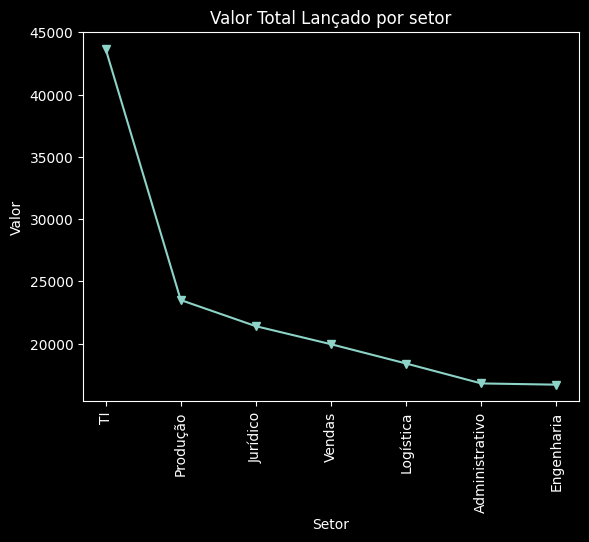

In [16]:
# Verificando o valor total dos lançamentos por setores
df.groupby(['Centro de Custo'])['Valor'].sum().sort_values(ascending=False).plot(marker = "v")
plt.title("Valor Total Lançado por setor")
plt.xticks(fontsize = 10, rotation = 90)
plt.ylabel("Valor")
plt.xlabel("Setor");

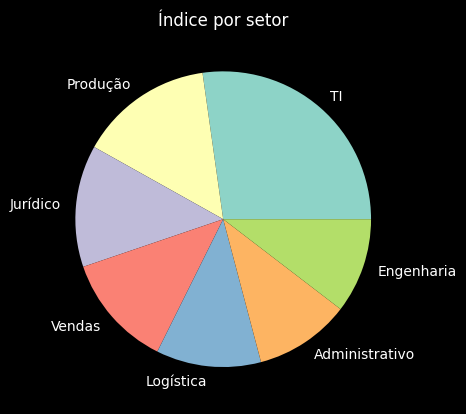

In [17]:
df.groupby(['Centro de Custo'])['Valor'].sum().sort_values(ascending=False).plot.pie()
plt.title("Índice por setor")
plt.ylabel(" ");

In [18]:
# Criando uma coluna para calcular o tempo que falta para o Vencimento da Nota
df['Prazo do Vencimento'] = df['Vencimento'] - df['Emissão']
display(df['Prazo do Vencimento'].head(10))

0    9 days
1   10 days
2   10 days
3   10 days
4   10 days
5   10 days
6   10 days
7   10 days
8   29 days
9   30 days
Name: Prazo do Vencimento, dtype: timedelta64[ns]